In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Función para aplicar el algoritmo FCFS y graficar, devolviendo un DataFrame con los resultados y métricas
def algoritmoFCFS(df_procesos, N):
    print("Algoritmo FCFS (First-Come, First-Served)")
    print("=========================================")
    print(df_procesos)
    print("=========================================")
    print("     ") 
    # Inicializar variables
    tiempo_actual = 0
    tiempo_total_ejecucion = 0
    tiempo_total_espera = 0
    resultados = []

    # Crear una figura y un conjunto de ejes con un tamaño mayor
    fig, ax = plt.subplots(figsize=(12, 4))  # Aumentamos la altura de 2 a 4 para que sea más alto

    # Ajustar los márgenes de la figura para reducir el espacio en blanco
    plt.subplots_adjust(top=0.6, bottom=0.3, left=0.2, right=0.9)

    # Crear una línea desde 0 hasta N
    ax.plot([0, N], [0, 0], color="blue", lw=2)

    # Recorrer los procesos en el orden en que llegaron (FCFS)
    for index, row in df_procesos.iterrows():
        proceso = row['Proceso']
        tiempo_llegada = row['Tiempo de Llegada']
        tiempo_ejecucion = row['Tiempo de Ejecución']

        # Si el proceso llega después del tiempo actual, esperar
        if tiempo_llegada > tiempo_actual:
            tiempo_actual = tiempo_llegada

        # Calcular tiempos
        tiempo_inicio = tiempo_actual
        tiempo_espera = tiempo_inicio - tiempo_llegada
        tiempo_respuesta = tiempo_actual - tiempo_llegada
        tiempo_fin = tiempo_actual + tiempo_ejecucion

        # Sumar tiempos para las métricas
        tiempo_total_ejecucion += tiempo_ejecucion
        tiempo_total_espera += tiempo_espera

        # Guardar los resultados en la lista
        resultados.append({
            "Proceso": proceso,
            "Tiempo de Llegada": tiempo_llegada,
            "Tiempo de Ejecución": tiempo_ejecucion,
            "Tiempo de Inicio": tiempo_inicio,
            "Tiempo de Espera": tiempo_espera,
            "Tiempo de Respuesta": tiempo_respuesta,
            "Tiempo de Fin": tiempo_fin
        })

        # Graficar la ejecución del proceso
        ax.plot([tiempo_inicio, tiempo_fin], [0, 0], lw=10, label=f'{proceso} ')

        # Añadir un marcador en el punto donde llega el proceso
        ax.scatter(tiempo_llegada, 0, color="red", s=100, zorder=5)  # Marcador para la llegada
        ax.text(tiempo_llegada, 0.1, f"{proceso}", fontsize=12, ha="center", color="black")  # Texto del proceso

        # Actualizar el tiempo actual al finalizar la ejecución
        tiempo_actual = tiempo_fin

    # Calcular métricas
    num_procesos = len(df_procesos)
    utilizacion_cpu = tiempo_total_ejecucion / N
    tasa_procesamiento = num_procesos / N
    tiempo_espera_promedio = tiempo_total_espera / num_procesos

    # Mostrar las métricas
    print(f"Utilización de la CPU: {utilizacion_cpu:.2f}")
    print(f"Tasa de procesamiento: {tasa_procesamiento:.2f} procesos por unidad de tiempo")
    print(f"Tiempo de espera promedio: {tiempo_espera_promedio:.2f} unidades de tiempo")

    # Configurar el eje x para que muestre tiempos desde 0 hasta N
    ax.set_xlim(0, N)
    ax.set_xticks(range(0, N+1, 1))

    # Añadir etiquetas y título
    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Línea de tiempo")
    ax.set_title(f"Algoritmo FCFS - Desde 0 hasta {N}")

    # Mover la leyenda al lado izquierdo, fuera del gráfico
    ax.legend(loc="center right", bbox_to_anchor=(-0.15, 0.5))

    # Mostrar el gráfico
    plt.show()

    # Crear un DataFrame con los resultados
    df_resultados = pd.DataFrame(resultados)

    return df_resultados, utilizacion_cpu, tasa_procesamiento, tiempo_espera_promedio




Algoritmo FCFS (First-Come, First-Served)
  Proceso  Tiempo de Llegada  Tiempo de Ejecución
0      P1                  0                    8
1      P2                  1                    4
2      P3                  2                    9
3      P4                  3                    5
     
Utilización de la CPU: 0.87
Tasa de procesamiento: 0.13 procesos por unidad de tiempo
Tiempo de espera promedio: 8.75 unidades de tiempo


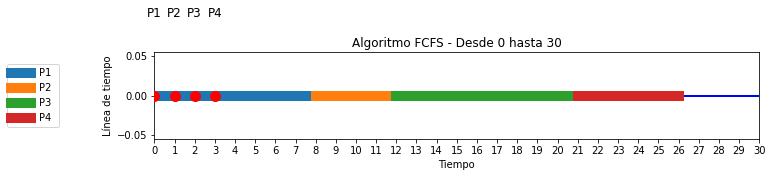

,Proceso,Tiempo de Llegada,Tiempo de Ejecución,Tiempo de Inicio,Tiempo de Espera,Tiempo de Respuesta,Tiempo de Fin
0,P1,0,8,0,0,0,8
1,P2,1,4,8,7,7,12
2,P3,2,9,12,10,10,21
3,P4,3,5,21,18,18,26


In [6]:
# Ejemplo de uso
df_procesos = pd.DataFrame({
    "Proceso": ['P1', 'P2', 'P3', 'P4'],
    "Tiempo de Llegada": [0, 1, 2, 3],
    "Tiempo de Ejecución": [8, 4, 9, 5]
})

# Ejecutar la función con N=30 y obtener el DataFrame y las métricas
df_resultado, utilizacion_cpu, tasa_procesamiento, tiempo_espera_promedio = algoritmoFCFS(df_procesos, 30)

# Mostrar el DataFrame resultante
df_resultado

Algoritmo FCFS (First-Come, First-Served)
  Proceso  Tiempo de Llegada  Tiempo de Ejecución
0      P1                  0                   24
1      P2                  0                    3
2      P3                  0                    3
     
Utilización de la CPU: 0.75
Tasa de procesamiento: 0.07 procesos por unidad de tiempo
Tiempo de espera promedio: 17.00 unidades de tiempo


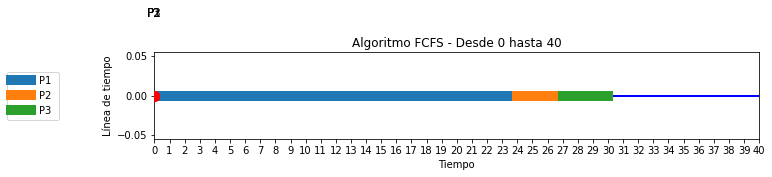

,Proceso,Tiempo de Llegada,Tiempo de Ejecución,Tiempo de Inicio,Tiempo de Espera,Tiempo de Respuesta,Tiempo de Fin
0,P1,0,24,0,0,0,24
1,P2,0,3,24,24,24,27
2,P3,0,3,27,27,27,30


In [76]:
# Ejemplo de uso
df_procesos = pd.DataFrame({
    "Proceso": ['P1', 'P2', 'P3'],
    "Tiempo de Llegada": [0, 0, 0],
    "Tiempo de Ejecución": [24, 3, 3]
})

# Ejecutar la función con N=30 y obtener el DataFrame y las métricas
df_resultado, utilizacion_cpu, tasa_procesamiento, tiempo_espera_promedio = algoritmoFCFS(df_procesos, 40)

# Mostrar el DataFrame resultante

df_resultado

Algoritmo FCFS (First-Come, First-Served)
  Proceso  Tiempo de Llegada  Tiempo de Ejecución
0      P2                  0                    3
1      P3                  0                    3
2      P1                  0                   24
     
Utilización de la CPU: 0.75
Tasa de procesamiento: 0.07 procesos por unidad de tiempo
Tiempo de espera promedio: 3.00 unidades de tiempo


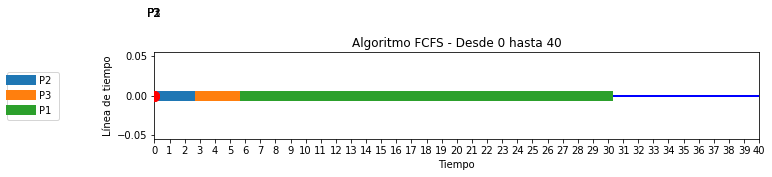

,Proceso,Tiempo de Llegada,Tiempo de Ejecución,Tiempo de Inicio,Tiempo de Espera,Tiempo de Respuesta,Tiempo de Fin
0,P2,0,3,0,0,0,3
1,P3,0,3,3,3,3,6
2,P1,0,24,6,6,6,30


In [77]:
# Ejemplo de uso
df_procesos = pd.DataFrame({
    "Proceso": ['P2', 'P3', 'P1'],
    "Tiempo de Llegada": [0, 0, 0],
    "Tiempo de Ejecución": [3, 3, 24]
})

# Ejecutar la función con N=30 y obtener el DataFrame y las métricas
df_resultado, utilizacion_cpu, tasa_procesamiento, tiempo_espera_promedio = algoritmoFCFS(df_procesos, 40)

# Mostrar el DataFrame resultante

df_resultado

Algoritmo FCFS (First-Come, First-Served)
  Proceso  Tiempo de Llegada  Tiempo de Ejecución
0      P1                  0                    8
1      P2                  2                    4
2      P3                  4                    9
3      P4                  6                    5
     
Utilización de la CPU: 0.87
Tasa de procesamiento: 0.13 procesos por unidad de tiempo
Tiempo de espera promedio: 7.25 unidades de tiempo


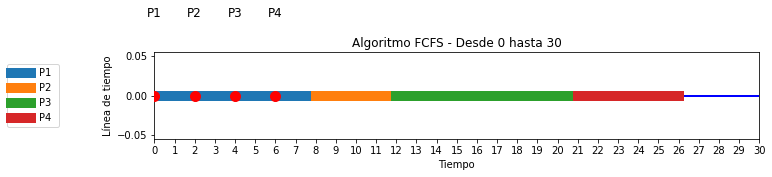

,Proceso,Tiempo de Llegada,Tiempo de Ejecución,Tiempo de Inicio,Tiempo de Espera,Tiempo de Respuesta,Tiempo de Fin
0,P1,0,8,0,0,0,8
1,P2,2,4,8,6,6,12
2,P3,4,9,12,8,8,21
3,P4,6,5,21,15,15,26


In [79]:
# Ejemplo de uso
df_procesos = pd.DataFrame({
    "Proceso": ['P1', 'P2', 'P3','P4'],
    "Tiempo de Llegada": [0, 2, 4,6],
    "Tiempo de Ejecución": [8, 4, 9,5]
})

# Ejecutar la función con N=30 y obtener el DataFrame y las métricas
df_resultado, utilizacion_cpu, tasa_procesamiento, tiempo_espera_promedio = algoritmoFCFS(df_procesos, 30)

# Mostrar el DataFrame resultante

df_resultado

Algoritmo FCFS (First-Come, First-Served)
  Proceso  Tiempo de Llegada  Tiempo de Ejecución
0      P1                  0                    4
1      P2                  1                    3
2      P3                  2                    5
3      P4                  3                    2
4      P5                  4                    4
     
Utilización de la CPU: 0.60
Tasa de procesamiento: 0.17 procesos por unidad de tiempo
Tiempo de espera promedio: 5.40 unidades de tiempo


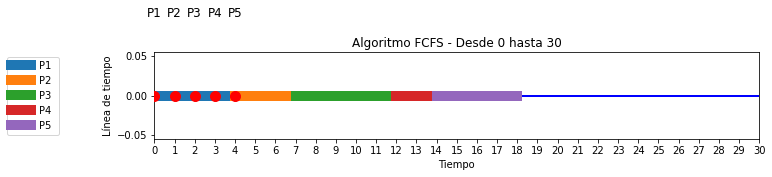

,Proceso,Tiempo de Llegada,Tiempo de Ejecución,Tiempo de Inicio,Tiempo de Espera,Tiempo de Respuesta,Tiempo de Fin
0,P1,0,4,0,0,0,4
1,P2,1,3,4,3,3,7
2,P3,2,5,7,5,5,12
3,P4,3,2,12,9,9,14
4,P5,4,4,14,10,10,18


In [10]:
# Ejemplo de uso
df_procesos = pd.DataFrame({
    "Proceso": ['P1', 'P2', 'P3','P4','P5'],
    "Tiempo de Llegada": [0, 1,2,3,4],
    "Tiempo de Ejecución": [4,3,5,2,4]
})

# Ejecutar la función con N=30 y obtener el DataFrame y las métricas
df_resultado, utilizacion_cpu, tasa_procesamiento, tiempo_espera_promedio = algoritmoFCFS(df_procesos, 30)

# Mostrar el DataFrame resultante

df_resultado

Algoritmo FCFS (First-Come, First-Served)
  Proceso  Tiempo de Llegada  Tiempo de Ejecución  Prioridad
0      P1                  0                    4          2
1      P2                  1                    3          1
2      P3                  2                    5          3
3      P4                  3                    2          4
4      P5                  4                    4          2
     
Utilización de la CPU: 0.90
Tasa de procesamiento: 0.25 procesos por unidad de tiempo
Tiempo de espera promedio: 5.40 unidades de tiempo


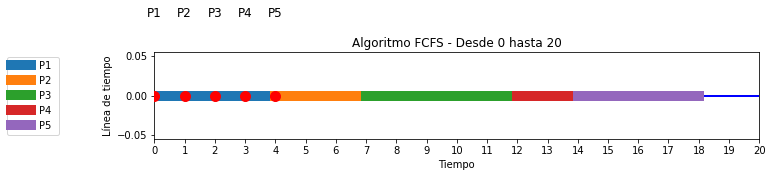

,Proceso,Tiempo de Llegada,Tiempo de Ejecución,Tiempo de Inicio,Tiempo de Espera,Tiempo de Respuesta,Tiempo de Fin
0,P1,0,4,0,0,0,4
1,P2,1,3,4,3,3,7
2,P3,2,5,7,5,5,12
3,P4,3,2,12,9,9,14
4,P5,4,4,14,10,10,18


In [4]:
import pandas as pd

# Datos de los procesos basados en la tabla
df_procesos = pd.DataFrame({
    "Proceso": ['P1', 'P2', 'P3', 'P4', 'P5'],
    "Tiempo de Llegada": [0, 1, 2, 3, 4],
    "Tiempo de Ejecución": [4, 3, 5, 2, 4],
    "Prioridad": [2, 1, 3, 4, 2]  # No utilizado en RR, pero incluido para referencia
})

# Ejecutar la función con un quantum de 2 y N=20
df_resultado, utilizacion_cpu, tasa_procesamiento, tiempo_espera_promedio = algoritmoFCFS(df_procesos, 20)

# Mostrar el DataFrame resultante
(df_resultado)

Algoritmo FCFS (First-Come, First-Served)
  Proceso  Tiempo de Llegada  Tiempo de Ejecución  Prioridad
0      P1                  0                    4          2
1      P2                  0                    1          1
2      P3                  0                    2          3
3      P4                  0                    1          4
4      P5                  0                    3          2
     
Utilización de la CPU: 0.73
Tasa de procesamiento: 0.33 procesos por unidad de tiempo
Tiempo de espera promedio: 4.80 unidades de tiempo


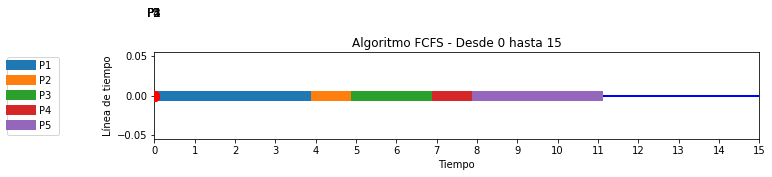

,Proceso,Tiempo de Llegada,Tiempo de Ejecución,Tiempo de Inicio,Tiempo de Espera,Tiempo de Respuesta,Tiempo de Fin
0,P1,0,4,0,0,0,4
1,P2,0,1,4,4,4,5
2,P3,0,2,5,5,5,7
3,P4,0,1,7,7,7,8
4,P5,0,3,8,8,8,11


In [2]:
import pandas as pd

# Datos de los procesos basados en la tabla
df_procesos = pd.DataFrame({
    "Proceso": ['P1', 'P2', 'P3','P4','P5'],
    "Tiempo de Llegada": [0, 0, 0,0,0],
    "Tiempo de Ejecución": [4, 1, 2,1,3],
    "Prioridad": [2, 1, 3, 4, 2]  # Prioridades añadidas
    # No utilizado en RR, pero incluido para referencia
})

# Ejecutar la función con un quantum de 2 y N=20
df_resultado, utilizacion_cpu, tasa_procesamiento, tiempo_espera_promedio = algoritmoFCFS(df_procesos, 15)

# Mostrar el DataFrame resultante
(df_resultado)